#**Deep Learning**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.datasets
import torchvision.transforms
import torch.nn.functional as F
from tqdm import tqdm
import random

### Vanishing Gradient Promblem

In [ ]:
random.seed(2022)
torch.manual_seed(2022)

mnist_train = torchvision.datasets.MNIST(root='MNIST_data/', train=True, transform=torchvision.transforms.ToTensor(), download=True)
mnist_test = torchvision.datasets.MNIST(root='MNIST_data/', train=False,transform=torchvision.transforms.ToTensor(),download=True)

train_loader = torch.utils.data.DataLoader(dataset=mnist_train, shuffle=True, drop_last=True)
test_loader = torch.utils.data.DataLoader(dataset=mnist_test, shuffle=True, drop_last=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [ ]:
class Classifier(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim,device, output_dim, lr = 0.001, epochs = 10, activation='sigmoid'):
        super(Classifier, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.epochs = epochs
        self.total_losses = []
        self.accuracy=[]
        self.lr = lr
        self.device = device
        self.activation = activation
        self.losses=[]

        self.fc1 = torch.nn.Linear(, ).to(self.device)
        self.fc2 = torch.nn.Linear(, ).to(self.device)
        self.fc3 = torch.nn.Linear(, ).to(self.device)
        self.fc4 = torch.nn.Linear(, ).to(self.device)
        
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        torch.nn.init.xavier_uniform_(self.fc3.weight)
        torch.nn.init.xavier_uniform_(self.fc4.weight)
        
    def forward(self, x):
        if self.activation == 'relu':
            pred = F.relu(self.fc1(x))
            pred = F.relu(self.fc2(pred))
            pred = F.relu(self.fc3(pred))
            pred = self.fc4(pred)
        else:
            pred = torch.sigmoid(self.fc1(x))
            pred = torch.sigmoid(self.fc2(pred))
            pred = torch.sigmoid(self.fc3(pred))
            pred = self.fc4(pred)
        
        return pred

    def fit(self, data):
        criterion = torch.nn.CrossEntropyLoss().to(self.device)
        optimizer = torch.optim.SGD(self.parameters(), lr = self.lr)
        for _ in range(self.epochs):
            total_loss=0
            total_accuracy=0
            for x, y in tqdm(data):
                x = x.view(-1,784).to(self.device)
                y = y.to(self.device)

                #Optimizer 초기화
                
                pred = self.forward(x)

                #Loss 계산

                #Backward를 통해 Gradient 계산
                
                #Optimizer를 통해 Update

                correct_pred = torch.argmax(pred,1) == y
                accuracy = correct_pred.float().mean()
                total_accuracy+=accuracy.item()
                total_loss+=loss.item()
                self.losses.append(loss.item())
                
            print('Epoch {} Loss: '.format(_+1),total_loss/len(data))
            self.accuracy.append(total_accuracy/len(data))
            self.total_losses.append(total_loss/len(data))

    def evaluation(self, x, y):
        with torch.no_grad():
            criterion = torch.nn.CrossEntropyLoss().to(self.device)
            pred = self.forward(x)
            loss = criterion(pred, y)
            correct_pred = torch.argmax(pred,1) == y
            accuracy = correct_pred.float().mean()
            print('Accuracy', accuracy.item())
        
        return accuracy.item()

    def get_weights(self):
        return [self.fc1.weight, self.fc2.weight,self.fc3.weight, self.fc4.weight]


##### MLP with Sigmoid function 

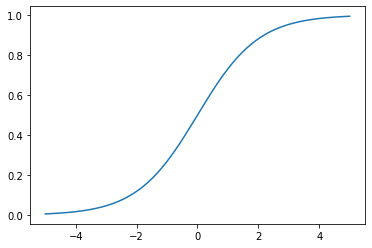

In [ ]:
def activ(x):
    #e^x np.exp()
    return 

x_grid = np.linspace(-5,5,200).reshape(-1,1)
plt.plot(x_grid,activ(x_grid))

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model_sig = Classifier(input_dim = 784, hidden_dim=(256,128,64), output_dim=10,device=device, activation='sigmoid')

weight__ = model_sig.get_weights()

print(weight__[1])
print(weight__[2])
print(weight__[3])

Parameter containing:
tensor([[-0.0516,  0.0206, -0.0299,  ..., -0.1163,  0.0176, -0.0878],
        [ 0.0472,  0.0661, -0.0859,  ..., -0.0967, -0.0728,  0.0862],
        [ 0.0225,  0.0326, -0.0543,  ...,  0.1114,  0.0289,  0.0387],
        ...,
        [-0.0565, -0.1189, -0.1135,  ..., -0.0577,  0.0445, -0.1065],
        [-0.0026, -0.0905,  0.1064,  ...,  0.0800,  0.0386,  0.0853],
        [-0.0711, -0.0740, -0.0558,  ..., -0.0601,  0.0824,  0.0583]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0180, -0.0248,  0.1713,  ...,  0.1135,  0.0630,  0.0619],
        [-0.0964, -0.1356, -0.0451,  ...,  0.1171, -0.1058, -0.1548],
        [ 0.0885,  0.0707, -0.1264,  ...,  0.0915, -0.1332, -0.0729],
        ...,
        [ 0.0256, -0.1708, -0.1196,  ..., -0.1400, -0.0090, -0.0588],
        [-0.0676,  0.0044,  0.0050,  ...,  0.0424,  0.0066,  0.0587],
        [-0.1699,  0.1375, -0.0634,  ..., -0.1027,  0.0750,  0.0110]],
       device='cuda:0', requires_grad=True)


In [ ]:
model_sig.fit(train_loader)

100%|██████████| 60000/60000 [01:33<00:00, 638.83it/s]


Epoch 1 Loss:  2.258004296114047


100%|██████████| 60000/60000 [01:32<00:00, 649.13it/s]


Epoch 2 Loss:  1.5060044960511227


100%|██████████| 60000/60000 [01:33<00:00, 644.24it/s]


Epoch 3 Loss:  0.7662446841366278


100%|██████████| 60000/60000 [01:31<00:00, 652.86it/s]


Epoch 4 Loss:  0.5389829377032739


100%|██████████| 60000/60000 [01:31<00:00, 657.57it/s]


Epoch 5 Loss:  0.44051406837807733


100%|██████████| 60000/60000 [01:31<00:00, 658.14it/s]


Epoch 6 Loss:  0.38388346168227727


100%|██████████| 60000/60000 [01:31<00:00, 657.45it/s]


Epoch 7 Loss:  0.3466110587688648


100%|██████████| 60000/60000 [01:30<00:00, 660.47it/s]


Epoch 8 Loss:  0.3215856880114763


100%|██████████| 60000/60000 [01:30<00:00, 662.30it/s]


Epoch 9 Loss:  0.30318739825006924


100%|██████████| 60000/60000 [01:30<00:00, 659.53it/s]

Epoch 10 Loss:  0.28741767356107206


In [ ]:
weight__ = model_sig.get_weights()
print(weight__[1])
print(weight__[2])
print(weight__[3])

Parameter containing:
tensor([[-0.0686,  0.0580, -0.0941,  ..., -0.1413,  0.0717, -0.1391],
        [ 0.0475,  0.0379, -0.0702,  ..., -0.0660, -0.1099,  0.0535],
        [ 0.0358, -0.0017, -0.0830,  ...,  0.0562,  0.0022,  0.1011],
        ...,
        [-0.0900, -0.1778, -0.0185,  ..., -0.0928,  0.0945, -0.1001],
        [-0.0226, -0.1324,  0.1560,  ...,  0.0744, -0.0382,  0.1032],
        [-0.0917, -0.0731, -0.0909,  ..., -0.0947,  0.0608,  0.0735]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.1049,  0.1408,  0.2085,  ...,  0.2442,  0.0316,  0.1901],
        [-0.0195, -0.0400, -0.2170,  ...,  0.1656, -0.0411, -0.1578],
        [ 0.0730,  0.3378, -0.1625,  ..., -0.0023, -0.3594, -0.2963],
        ...,
        [ 0.1400, -0.2512, -0.2374,  ..., -0.0759, -0.1338, -0.1510],
        [-0.0808,  0.0539,  0.0137,  ..., -0.0437, -0.0978,  0.0066],
        [-0.2605,  0.1162,  0.0655,  ..., -0.1395,  0.2328,  0.0559]],
       device='cuda:0', requires_grad=True)


##### MLP with ReLU function 

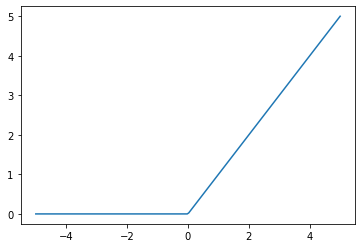

In [ ]:
x_grid = np.linspace(-5,5,200).reshape(-1,1)
plt.plot(x_grid,F.relu(torch.tensor(x_grid)))

In [ ]:
model_relu = Classifier(input_dim = 784, hidden_dim=(256,128,64), output_dim=10,device=device, activation='relu')

weight__ = model_relu.get_weights()

print(weight__[1])
print(weight__[2])
print(weight__[3])

Parameter containing:
tensor([[-0.0788,  0.0948,  0.0811,  ...,  0.0621, -0.0877, -0.1155],
        [-0.0062, -0.0505,  0.0487,  ...,  0.0530,  0.0828,  0.0647],
        [-0.0443, -0.0739, -0.0677,  ...,  0.0570,  0.0707,  0.1179],
        ...,
        [ 0.0309,  0.0642,  0.1220,  ...,  0.0698,  0.1041,  0.0810],
        [-0.0482, -0.1109,  0.0246,  ...,  0.1190, -0.0135, -0.0920],
        [-0.1206, -0.0072, -0.1064,  ...,  0.0550,  0.0984,  0.0649]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.0745,  0.0982,  0.0716,  ..., -0.0615,  0.1239,  0.0058],
        [-0.0807, -0.1717,  0.0530,  ..., -0.1156,  0.1498, -0.0081],
        [-0.0348, -0.1387, -0.0184,  ..., -0.0882,  0.0542, -0.0426],
        ...,
        [-0.1123,  0.1205,  0.0082,  ...,  0.1224,  0.1346,  0.0108],
        [ 0.0453,  0.0799, -0.0979,  ..., -0.1048,  0.1532, -0.0399],
        [ 0.0760, -0.1586,  0.0747,  ...,  0.0583,  0.0294, -0.1044]],
       device='cuda:0', requires_grad=True)


In [ ]:
model_relu.fit(train_loader)

100%|██████████| 60000/60000 [01:32<00:00, 650.90it/s]


Epoch 1 Loss:  0.363327749382417


100%|██████████| 60000/60000 [01:31<00:00, 652.62it/s]


Epoch 2 Loss:  0.1523065240601691


100%|██████████| 60000/60000 [01:32<00:00, 651.59it/s]


Epoch 3 Loss:  0.10408780320204669


100%|██████████| 60000/60000 [01:32<00:00, 651.77it/s]


Epoch 4 Loss:  0.0787270494169636


100%|██████████| 60000/60000 [01:31<00:00, 656.16it/s]


Epoch 5 Loss:  0.06267599235423642


100%|██████████| 60000/60000 [01:31<00:00, 654.14it/s]


Epoch 6 Loss:  0.050864713917251676


100%|██████████| 60000/60000 [01:31<00:00, 653.27it/s]


Epoch 7 Loss:  0.041298305257505906


100%|██████████| 60000/60000 [01:31<00:00, 655.84it/s]


Epoch 8 Loss:  0.03326335309964715


100%|██████████| 60000/60000 [01:31<00:00, 656.60it/s]


Epoch 9 Loss:  0.02753185433995348


100%|██████████| 60000/60000 [01:31<00:00, 652.39it/s]

Epoch 10 Loss:  0.021742749816556592


In [ ]:
weight__ = model_relu.get_weights()

print(weight__[1])
print(weight__[2])
print(weight__[3])

Parameter containing:
tensor([[-0.0133,  0.0852,  0.0715,  ...,  0.0355, -0.1318, -0.1321],
        [-0.0033, -0.0874,  0.0355,  ...,  0.0484,  0.0574,  0.0585],
        [-0.0494, -0.1106, -0.0722,  ...,  0.0324,  0.0862,  0.1595],
        ...,
        [ 0.0664,  0.0266,  0.1197,  ...,  0.0954,  0.1142,  0.0895],
        [-0.0578, -0.1266,  0.0517,  ...,  0.0596, -0.0023, -0.0988],
        [-0.1183, -0.0557, -0.1652,  ...,  0.0534,  0.1157,  0.0878]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.1060,  0.1066,  0.0498,  ..., -0.0507,  0.1632, -0.0267],
        [-0.0393, -0.1708,  0.1368,  ..., -0.1423,  0.2770, -0.0102],
        [-0.0670, -0.1627,  0.0302,  ..., -0.0873,  0.1138,  0.0161],
        ...,
        [-0.1258,  0.0962,  0.0359,  ...,  0.1477,  0.1533,  0.0302],
        [ 0.0961,  0.0894, -0.1407,  ..., -0.0821,  0.1653, -0.0817],
        [ 0.1220, -0.1601,  0.1356,  ...,  0.1406,  0.0613, -0.0397]],
       device='cuda:0', requires_grad=True)


In [ ]:
test_x = mnist_test.data.view(-1,784).float().to(device)
test_y = mnist_test.targets.to(device)
model_sig.evaluation(test_x,test_y)
model_relu.evaluation(test_x,test_y)

Accuracy 0.9077000021934509
Accuracy 0.9732999801635742


0.9732999801635742

### Activation function

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


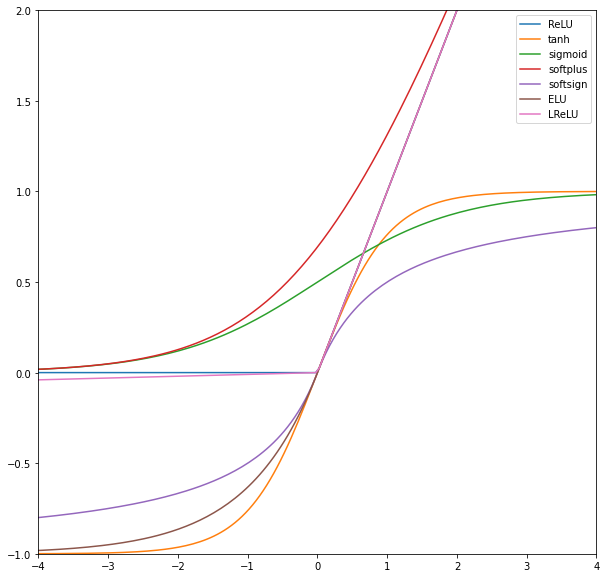

In [ ]:
x_grid = np.linspace(-5,5,200).reshape(-1,1)

plt.figure(figsize=(10,10))
plt.plot(x_grid,F.relu(torch.tensor(x_grid)), label='ReLU')
plt.plot(x_grid,F.tanh(torch.tensor(x_grid)), label='tanh')
plt.plot(x_grid,F.sigmoid(torch.tensor(x_grid)), label='sigmoid')
plt.plot(x_grid,F.softplus(torch.tensor(x_grid)), label='softplus')
plt.plot(x_grid,F.softsign(torch.tensor(x_grid)), label='softsign')
plt.plot(x_grid,F.elu(torch.tensor(x_grid)), label='ELU')
plt.plot(x_grid,F.leaky_relu(torch.tensor(x_grid)), label='LReLU')
plt.xlim(-4,4)
plt.ylim(-1,2)
plt.legend()

### Mini-batch Gradient Descent

##### Loss with **Stochastic Gradient Descent**

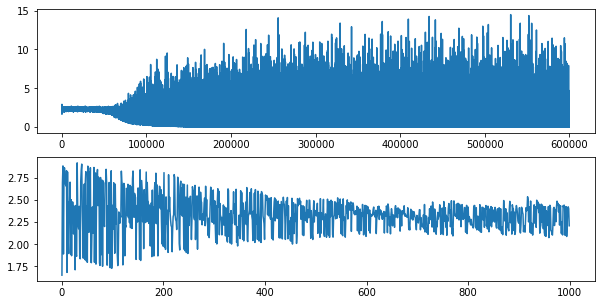

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(2,1,1)
ax.plot(model_sig.losses)
ax = fig.add_subplot(2,1,2)
ax.plot(model_sig.losses[:1000])

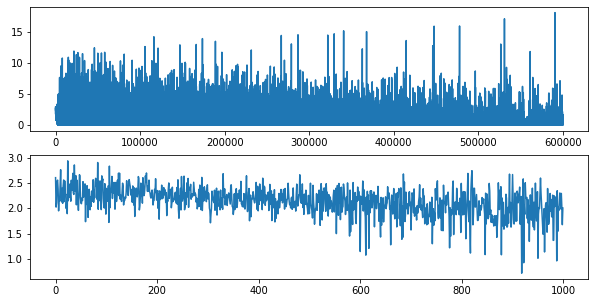

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(2,1,1)
ax.plot(model_relu.losses)
ax = fig.add_subplot(2,1,2)
ax.plot(model_relu.losses[:1000])

##### Loss with **Batch Gradient Descent**

In [ ]:
batch_size = 60000

train_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = torch.utils.data.DataLoader(dataset=mnist_test, shuffle=True, drop_last=True)

model_relu_bat = Classifier(input_dim = 784, hidden_dim=(256,128,64), output_dim=10,device=device, activation='relu')

model_relu_bat.fit(train_loader)

test_x = mnist_test.data.view(-1,784).float().to(device)
test_y = mnist_test.targets.to(device)
model_relu_bat.evaluation(test_x,test_y)

100%|██████████| 1/1 [00:04<00:00,  4.91s/it]


Epoch 1 Loss:  2.339146852493286


100%|██████████| 1/1 [00:04<00:00,  4.56s/it]


Epoch 2 Loss:  2.3386433124542236


100%|██████████| 1/1 [00:04<00:00,  4.63s/it]


Epoch 3 Loss:  2.3381402492523193


100%|██████████| 1/1 [00:04<00:00,  4.59s/it]


Epoch 4 Loss:  2.3376386165618896


100%|██████████| 1/1 [00:04<00:00,  4.61s/it]


Epoch 5 Loss:  2.337137460708618


100%|██████████| 1/1 [00:04<00:00,  4.67s/it]


Epoch 6 Loss:  2.3366377353668213


100%|██████████| 1/1 [00:04<00:00,  4.62s/it]


Epoch 7 Loss:  2.336139678955078


100%|██████████| 1/1 [00:04<00:00,  4.61s/it]


Epoch 8 Loss:  2.3356423377990723


100%|██████████| 1/1 [00:04<00:00,  4.60s/it]


Epoch 9 Loss:  2.3351454734802246


100%|██████████| 1/1 [00:04<00:00,  4.63s/it]

Epoch 10 Loss:  2.3346502780914307
Accuracy 0.0843999981880188


0.0843999981880188

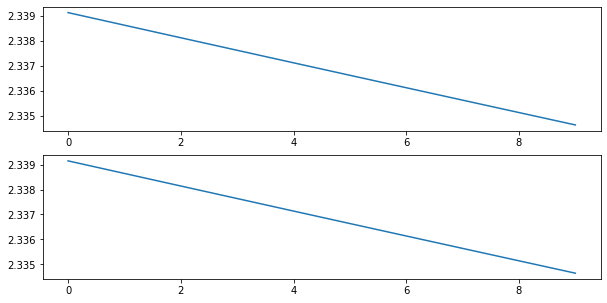

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(2,1,1)
ax.plot(model_relu_bat.losses)
ax = fig.add_subplot(2,1,2)
ax.plot(model_relu_bat.losses[:1000])

##### Loss with **Mini-Batch Gradient Descent**

In [ ]:
batch_size = 128

train_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

In [ ]:
model_relu_mini = Classifier(input_dim = 784, hidden_dim=(256,128,64), output_dim=10,device=device, activation='relu')

model_relu_mini.fit(train_loader)

100%|██████████| 468/468 [00:05<00:00, 88.16it/s]


Epoch 1 Loss:  2.2570529585210686


100%|██████████| 468/468 [00:05<00:00, 87.92it/s]


Epoch 2 Loss:  2.002778268013245


100%|██████████| 468/468 [00:05<00:00, 87.28it/s]


Epoch 3 Loss:  1.6985209668293977


100%|██████████| 468/468 [00:05<00:00, 87.54it/s]


Epoch 4 Loss:  1.3596406016084883


100%|██████████| 468/468 [00:05<00:00, 87.57it/s]


Epoch 5 Loss:  1.0768180708599906


100%|██████████| 468/468 [00:05<00:00, 87.61it/s]


Epoch 6 Loss:  0.8804528556573086


100%|██████████| 468/468 [00:05<00:00, 88.31it/s]


Epoch 7 Loss:  0.7494022271826736


100%|██████████| 468/468 [00:05<00:00, 87.52it/s]


Epoch 8 Loss:  0.6597581848374798


100%|██████████| 468/468 [00:05<00:00, 87.49it/s]


Epoch 9 Loss:  0.5957504752227384


100%|██████████| 468/468 [00:05<00:00, 87.66it/s]

Epoch 10 Loss:  0.5477087746063868


In [ ]:
test_x = mnist_test.data.view(-1,784).float().to(device)
test_y = mnist_test.targets.to(device)
print(model_relu_mini.evaluation(test_x,test_y))

Accuracy 0.8687999844551086
0.8687999844551086


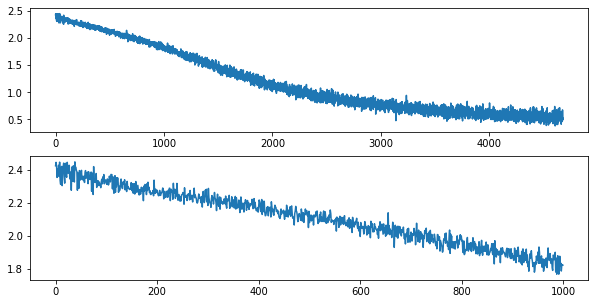

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(2,1,1)
ax.plot(model_relu_mini.losses)
ax = fig.add_subplot(2,1,2)
ax.plot(model_relu_mini.losses[:1000])

### Overfitting & Dropout
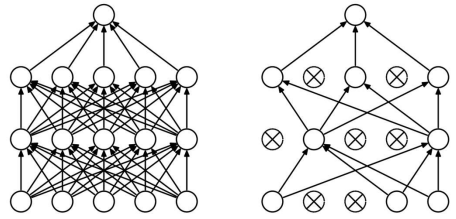

##### Overfitting

In [ ]:
rotate_transforms = torchvision.transforms.Compose([torchvision.transforms.RandomRotation(0.2),
                                                    torchvision.transforms.Resize(35),
                                                    torchvision.transforms.CenterCrop(28),
                                                    torchvision.transforms.RandomHorizontalFlip(),
                                                    torchvision.transforms.ToTensor()])

rotate_mnist_train = torchvision.datasets.MNIST(root='MNIST_data/', train=True, transform=rotate_transforms, download=True)
rotate_mnist_test = torchvision.datasets.MNIST(root='MNIST_data/', train=False, transform=rotate_transforms, download=True)

batch_size = 128

rotate_train_loader = torch.utils.data.DataLoader(dataset=rotate_mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
rotate_test_loader = torch.utils.data.DataLoader(dataset=rotate_mnist_test, shuffle=True, drop_last=True)

In [ ]:
overfitting_model = Classifier(input_dim = 784, hidden_dim=(1024,1024,1024), output_dim=10, device=device, activation='relu', epochs=75)

overfitting_model.fit(rotate_train_loader)

100%|██████████| 468/468 [00:19<00:00, 24.20it/s]


Epoch 1 Loss:  2.159770093412481


100%|██████████| 468/468 [00:15<00:00, 30.87it/s]


Epoch 2 Loss:  1.8520122656964848


100%|██████████| 468/468 [00:15<00:00, 30.91it/s]


Epoch 3 Loss:  1.5005533807298057


100%|██████████| 468/468 [00:15<00:00, 30.74it/s]


Epoch 4 Loss:  1.1906173770499027


100%|██████████| 468/468 [00:15<00:00, 29.69it/s]


Epoch 5 Loss:  0.9826352206560282


100%|██████████| 468/468 [00:15<00:00, 30.81it/s]


Epoch 6 Loss:  0.8546195314225987


100%|██████████| 468/468 [00:15<00:00, 30.93it/s]


Epoch 7 Loss:  0.7723872405596268


100%|██████████| 468/468 [00:15<00:00, 30.77it/s]


Epoch 8 Loss:  0.715168787055036


100%|██████████| 468/468 [00:15<00:00, 30.69it/s]


Epoch 9 Loss:  0.6733354337067685


100%|██████████| 468/468 [00:15<00:00, 30.88it/s]


Epoch 10 Loss:  0.6411355107258527


100%|██████████| 468/468 [00:15<00:00, 30.82it/s]


Epoch 11 Loss:  0.6155190730196798


100%|██████████| 468/468 [00:15<00:00, 30.71it/s]


Epoch 12 Loss:  0.593760571991786


100%|██████████| 468/468 [00:15<00:00, 30.67it/s]


Epoch 13 Loss:  0.5756273301493409


100%|██████████| 468/468 [00:15<00:00, 30.83it/s]


Epoch 14 Loss:  0.5598803256821429


100%|██████████| 468/468 [00:15<00:00, 30.96it/s]


Epoch 15 Loss:  0.5457145616284802


100%|██████████| 468/468 [00:15<00:00, 30.83it/s]


Epoch 16 Loss:  0.533064627303527


100%|██████████| 468/468 [00:15<00:00, 30.94it/s]


Epoch 17 Loss:  0.521835442345876


100%|██████████| 468/468 [00:15<00:00, 31.01it/s]


Epoch 18 Loss:  0.5120578121043678


100%|██████████| 468/468 [00:15<00:00, 30.69it/s]


Epoch 19 Loss:  0.5018182314741306


100%|██████████| 468/468 [00:15<00:00, 30.80it/s]


Epoch 20 Loss:  0.4920204690633676


100%|██████████| 468/468 [00:15<00:00, 31.01it/s]


Epoch 21 Loss:  0.4835320754438384


100%|██████████| 468/468 [00:15<00:00, 30.91it/s]


Epoch 22 Loss:  0.4759940853358334


100%|██████████| 468/468 [00:15<00:00, 30.95it/s]


Epoch 23 Loss:  0.46874092786740035


100%|██████████| 468/468 [00:15<00:00, 30.87it/s]


Epoch 24 Loss:  0.4612037892270292


100%|██████████| 468/468 [00:15<00:00, 30.77it/s]


Epoch 25 Loss:  0.45526009161248165


100%|██████████| 468/468 [00:15<00:00, 30.85it/s]


Epoch 26 Loss:  0.4483329662655154


100%|██████████| 468/468 [00:15<00:00, 30.83it/s]


Epoch 27 Loss:  0.4423540521444928


100%|██████████| 468/468 [00:15<00:00, 30.82it/s]


Epoch 28 Loss:  0.43569765717555314


100%|██████████| 468/468 [00:15<00:00, 30.88it/s]


Epoch 29 Loss:  0.4297070489225224


100%|██████████| 468/468 [00:15<00:00, 30.67it/s]


Epoch 30 Loss:  0.4249851176690342


100%|██████████| 468/468 [00:15<00:00, 30.84it/s]


Epoch 31 Loss:  0.4186350279129468


100%|██████████| 468/468 [00:15<00:00, 30.82it/s]


Epoch 32 Loss:  0.4138892932325347


100%|██████████| 468/468 [00:15<00:00, 30.66it/s]


Epoch 33 Loss:  0.40860167374977696


100%|██████████| 468/468 [00:15<00:00, 30.82it/s]


Epoch 34 Loss:  0.4038212675378363


100%|██████████| 468/468 [00:15<00:00, 30.84it/s]


Epoch 35 Loss:  0.39862511622217983


100%|██████████| 468/468 [00:15<00:00, 30.71it/s]


Epoch 36 Loss:  0.3939847458695245


100%|██████████| 468/468 [00:15<00:00, 30.97it/s]


Epoch 37 Loss:  0.3892412847624375


100%|██████████| 468/468 [00:15<00:00, 30.91it/s]


Epoch 38 Loss:  0.3841945685955704


100%|██████████| 468/468 [00:15<00:00, 31.03it/s]


Epoch 39 Loss:  0.3798917575588084


100%|██████████| 468/468 [00:15<00:00, 30.81it/s]


Epoch 40 Loss:  0.37595945931015873


100%|██████████| 468/468 [00:15<00:00, 30.81it/s]


Epoch 41 Loss:  0.371490285341811


100%|██████████| 468/468 [00:15<00:00, 30.91it/s]


Epoch 42 Loss:  0.36720387258718157


100%|██████████| 468/468 [00:15<00:00, 30.87it/s]


Epoch 43 Loss:  0.36382511815326846


100%|██████████| 468/468 [00:15<00:00, 30.90it/s]


Epoch 44 Loss:  0.35998322267053473


100%|██████████| 468/468 [00:15<00:00, 30.97it/s]


Epoch 45 Loss:  0.3558501409541847


100%|██████████| 468/468 [00:15<00:00, 30.75it/s]


Epoch 46 Loss:  0.35234742468366254


100%|██████████| 468/468 [00:15<00:00, 30.88it/s]


Epoch 47 Loss:  0.3482599484805877


100%|██████████| 468/468 [00:15<00:00, 31.00it/s]


Epoch 48 Loss:  0.3448843109047311


100%|██████████| 468/468 [00:15<00:00, 31.10it/s]


Epoch 49 Loss:  0.3416484665348489


100%|██████████| 468/468 [00:15<00:00, 30.98it/s]


Epoch 50 Loss:  0.3384147768155632


100%|██████████| 468/468 [00:15<00:00, 30.62it/s]


Epoch 51 Loss:  0.3343614357022139


100%|██████████| 468/468 [00:15<00:00, 31.09it/s]


Epoch 52 Loss:  0.33078955546912986


100%|██████████| 468/468 [00:15<00:00, 30.85it/s]


Epoch 53 Loss:  0.32830513341941386


100%|██████████| 468/468 [00:15<00:00, 30.86it/s]


Epoch 54 Loss:  0.3253669900517178


100%|██████████| 468/468 [00:15<00:00, 30.82it/s]


Epoch 55 Loss:  0.3216165717468302


100%|██████████| 468/468 [00:15<00:00, 30.95it/s]


Epoch 56 Loss:  0.31909465828003025


100%|██████████| 468/468 [00:15<00:00, 30.92it/s]


Epoch 57 Loss:  0.31621059673464197


100%|██████████| 468/468 [00:15<00:00, 31.11it/s]


Epoch 58 Loss:  0.31359405344368046


100%|██████████| 468/468 [00:15<00:00, 30.82it/s]


Epoch 59 Loss:  0.31023875846822035


100%|██████████| 468/468 [00:15<00:00, 31.02it/s]


Epoch 60 Loss:  0.30811545755873376


100%|██████████| 468/468 [00:15<00:00, 30.80it/s]


Epoch 61 Loss:  0.30512825628885853


100%|██████████| 468/468 [00:15<00:00, 30.77it/s]


Epoch 62 Loss:  0.3027330885649237


100%|██████████| 468/468 [00:15<00:00, 30.82it/s]


Epoch 63 Loss:  0.29974703086364984


100%|██████████| 468/468 [00:15<00:00, 31.09it/s]


Epoch 64 Loss:  0.29748675453229845


100%|██████████| 468/468 [00:15<00:00, 30.93it/s]


Epoch 65 Loss:  0.29456711773816335


100%|██████████| 468/468 [00:15<00:00, 31.02it/s]


Epoch 66 Loss:  0.29237808771113044


100%|██████████| 468/468 [00:15<00:00, 30.60it/s]


Epoch 67 Loss:  0.29016120680886454


100%|██████████| 468/468 [00:15<00:00, 30.90it/s]


Epoch 68 Loss:  0.28710332254950816


100%|██████████| 468/468 [00:15<00:00, 30.84it/s]


Epoch 69 Loss:  0.2851329050385035


100%|██████████| 468/468 [00:15<00:00, 30.82it/s]


Epoch 70 Loss:  0.28299083856818


100%|██████████| 468/468 [00:15<00:00, 31.01it/s]


Epoch 71 Loss:  0.2805699015147666


100%|██████████| 468/468 [00:15<00:00, 30.88it/s]


Epoch 72 Loss:  0.27862743297830606


100%|██████████| 468/468 [00:15<00:00, 30.77it/s]


Epoch 73 Loss:  0.2767967713566927


100%|██████████| 468/468 [00:15<00:00, 30.70it/s]


Epoch 74 Loss:  0.2743521722781862


100%|██████████| 468/468 [00:15<00:00, 31.01it/s]

Epoch 75 Loss:  0.2726407398780187


In [ ]:
print(overfitting_model.accuracy[-1])

0.9209568643162394


In [ ]:
test_x = rotate_mnist_test.data.view(-1,784).float().to(device)
test_y = rotate_mnist_test.targets.to(device)
acc = overfitting_model.evaluation(test_x,test_y)

Accuracy 0.6735000014305115


In [ ]:
class Classifier_dropout(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim,device, output_dim, lr = 0.001, epochs = 10, activation='sigmoid',dropout=0.0):
        super(Classifier_dropout, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.epochs = epochs
        self.total_losses = []
        self.accuracy=[]
        self.lr = lr
        self.device = device
        self.activation = activation
        self.dropout = dropout

        self.fc1 = torch.nn.Linear(self.input_dim, self.hidden_dim[0]).to(self.device)
        self.dropout1 = torch.nn.Dropout(self.dropout)
        self.fc2 = torch.nn.Linear(self.hidden_dim[0], self.hidden_dim[1]).to(self.device)
        self.dropout2 = torch.nn.Dropout(self.dropout)
        self.fc3 = torch.nn.Linear(self.hidden_dim[1], self.hidden_dim[2]).to(self.device)
        self.dropout3 = torch.nn.Dropout(self.dropout)
        self.fc4 = torch.nn.Linear(self.hidden_dim[2], self.output_dim).to(self.device)
        self.dropout4 = torch.nn.Dropout(self.dropout)
        
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        torch.nn.init.xavier_uniform_(self.fc3.weight)
        torch.nn.init.xavier_uniform_(self.fc4.weight)
        
    def forward(self, x):
        if self.activation == 'relu':
            #dropout(layer)
            
            
        else:
            
        
        return pred

    def fit(self, data):
        criterion = torch.nn.CrossEntropyLoss().to(self.device)
        optimizer = torch.optim.SGD(self.parameters(), lr = self.lr)
        for _ in range(self.epochs):
            total_loss=0
            total_accuracy=0
            for x, y in tqdm(data):
                x = x.view(-1,784).to(self.device)
                y = y.to(self.device)
                optimizer.zero_grad()

                pred = self.forward(x)

                loss = criterion(pred, y)
                loss.backward()
                optimizer.step()
                correct_pred = torch.argmax(pred,1) == y
                accuracy = correct_pred.float().mean()
                total_accuracy+=accuracy.item()
                total_loss+=loss.item()
                
            print('Epoch {} Loss: '.format(_+1),total_loss/len(data))
            self.accuracy.append(total_accuracy/len(data))
            self.total_losses.append(total_loss/len(data))

    def evaluation(self, x, y):
        with torch.no_grad():
            self.eval()
            criterion = torch.nn.CrossEntropyLoss().to(self.device)
            pred = self.forward(x)
            loss = criterion(pred, y)
            correct_pred = torch.argmax(pred,1) == y
            accuracy = correct_pred.float().mean()
            print('Accuracy', accuracy.item())
        
        return accuracy.item()

    def get_weights(self):
        return [self.fc1.weight, self.fc2.weight,self.fc3.weight, self.fc4.weight]


In [ ]:
dropout_model = Classifier_dropout(input_dim = 784, hidden_dim=(1024,1024,1024), output_dim=10,device=device, activation='relu', epochs=75, dropout=0.2)

dropout_model.fit(rotate_train_loader)

100%|██████████| 468/468 [00:15<00:00, 30.84it/s]


Epoch 1 Loss:  2.219733623867361


100%|██████████| 468/468 [00:15<00:00, 30.95it/s]


Epoch 2 Loss:  2.021408956529748


100%|██████████| 468/468 [00:15<00:00, 30.87it/s]


Epoch 3 Loss:  1.7944257750979855


100%|██████████| 468/468 [00:15<00:00, 30.94it/s]


Epoch 4 Loss:  1.564422104603205


100%|██████████| 468/468 [00:15<00:00, 31.01it/s]


Epoch 5 Loss:  1.388302386061758


100%|██████████| 468/468 [00:15<00:00, 30.86it/s]


Epoch 6 Loss:  1.2641385386132786


100%|██████████| 468/468 [00:15<00:00, 30.85it/s]


Epoch 7 Loss:  1.1780511024925444


100%|██████████| 468/468 [00:15<00:00, 30.58it/s]


Epoch 8 Loss:  1.1170685776533225


100%|██████████| 468/468 [00:15<00:00, 30.93it/s]


Epoch 9 Loss:  1.0759592541517355


100%|██████████| 468/468 [00:15<00:00, 30.93it/s]


Epoch 10 Loss:  1.0378119294714725


100%|██████████| 468/468 [00:15<00:00, 30.93it/s]


Epoch 11 Loss:  1.0097221384445827


100%|██████████| 468/468 [00:15<00:00, 30.86it/s]


Epoch 12 Loss:  0.9893562777174844


100%|██████████| 468/468 [00:15<00:00, 30.80it/s]


Epoch 13 Loss:  0.9637688716762086


100%|██████████| 468/468 [00:15<00:00, 30.77it/s]


Epoch 14 Loss:  0.9426249137036821


100%|██████████| 468/468 [00:15<00:00, 30.74it/s]


Epoch 15 Loss:  0.9324924984039404


100%|██████████| 468/468 [00:15<00:00, 30.59it/s]


Epoch 16 Loss:  0.912272845960071


100%|██████████| 468/468 [00:15<00:00, 30.58it/s]


Epoch 17 Loss:  0.905122351187926


100%|██████████| 468/468 [00:15<00:00, 30.84it/s]


Epoch 18 Loss:  0.8886799907837158


100%|██████████| 468/468 [00:15<00:00, 30.16it/s]


Epoch 19 Loss:  0.8762957807789501


100%|██████████| 468/468 [00:15<00:00, 30.74it/s]


Epoch 20 Loss:  0.8676116507277529


100%|██████████| 468/468 [00:15<00:00, 30.58it/s]


Epoch 21 Loss:  0.8555787284659524


100%|██████████| 468/468 [00:15<00:00, 30.72it/s]


Epoch 22 Loss:  0.8452090161223696


100%|██████████| 468/468 [00:15<00:00, 30.43it/s]


Epoch 23 Loss:  0.8358523580763075


100%|██████████| 468/468 [00:15<00:00, 30.28it/s]


Epoch 24 Loss:  0.8228535208946619


100%|██████████| 468/468 [00:15<00:00, 29.90it/s]


Epoch 25 Loss:  0.8193524956193745


100%|██████████| 468/468 [00:15<00:00, 30.20it/s]


Epoch 26 Loss:  0.8143807748953501


100%|██████████| 468/468 [00:15<00:00, 30.82it/s]


Epoch 27 Loss:  0.8012260500437174


100%|██████████| 468/468 [00:15<00:00, 30.75it/s]


Epoch 28 Loss:  0.7925917240034821


100%|██████████| 468/468 [00:15<00:00, 30.79it/s]


Epoch 29 Loss:  0.7869950536734018


100%|██████████| 468/468 [00:15<00:00, 30.76it/s]


Epoch 30 Loss:  0.7767738650242487


100%|██████████| 468/468 [00:15<00:00, 30.75it/s]


Epoch 31 Loss:  0.7732973520317649


100%|██████████| 468/468 [00:15<00:00, 30.93it/s]


Epoch 32 Loss:  0.7707105201278996


100%|██████████| 468/468 [00:15<00:00, 30.86it/s]


Epoch 33 Loss:  0.7583391102205994


100%|██████████| 468/468 [00:15<00:00, 30.77it/s]


Epoch 34 Loss:  0.7513833664293982


100%|██████████| 468/468 [00:15<00:00, 30.61it/s]


Epoch 35 Loss:  0.7469072105665492


100%|██████████| 468/468 [00:15<00:00, 30.82it/s]


Epoch 36 Loss:  0.7429665385657905


100%|██████████| 468/468 [00:15<00:00, 30.76it/s]


Epoch 37 Loss:  0.7344151536623637


100%|██████████| 468/468 [00:15<00:00, 30.89it/s]


Epoch 38 Loss:  0.7332678171049836


100%|██████████| 468/468 [00:15<00:00, 30.56it/s]


Epoch 39 Loss:  0.7188204583576602


100%|██████████| 468/468 [00:15<00:00, 30.22it/s]


Epoch 40 Loss:  0.7200853004414811


100%|██████████| 468/468 [00:15<00:00, 30.81it/s]


Epoch 41 Loss:  0.7152569449355459


100%|██████████| 468/468 [00:15<00:00, 30.94it/s]


Epoch 42 Loss:  0.7095696172780461


100%|██████████| 468/468 [00:15<00:00, 30.81it/s]


Epoch 43 Loss:  0.6988035150700145


100%|██████████| 468/468 [00:15<00:00, 30.80it/s]


Epoch 44 Loss:  0.6979900025404416


100%|██████████| 468/468 [00:15<00:00, 30.51it/s]


Epoch 45 Loss:  0.6928187802943409


100%|██████████| 468/468 [00:15<00:00, 30.97it/s]


Epoch 46 Loss:  0.6881436829128836


100%|██████████| 468/468 [00:15<00:00, 30.80it/s]


Epoch 47 Loss:  0.6844669517416221


100%|██████████| 468/468 [00:15<00:00, 30.88it/s]


Epoch 48 Loss:  0.6763967118329473


100%|██████████| 468/468 [00:15<00:00, 30.75it/s]


Epoch 49 Loss:  0.6722368547676975


100%|██████████| 468/468 [00:15<00:00, 30.59it/s]


Epoch 50 Loss:  0.6659498452248737


100%|██████████| 468/468 [00:15<00:00, 30.46it/s]


Epoch 51 Loss:  0.6619396948406839


100%|██████████| 468/468 [00:15<00:00, 30.83it/s]


Epoch 52 Loss:  0.6609384433453919


100%|██████████| 468/468 [00:15<00:00, 30.68it/s]


Epoch 53 Loss:  0.6581668357054392


100%|██████████| 468/468 [00:15<00:00, 30.65it/s]


Epoch 54 Loss:  0.6522886463974276


100%|██████████| 468/468 [00:15<00:00, 30.80it/s]


Epoch 55 Loss:  0.6542721142371496


100%|██████████| 468/468 [00:15<00:00, 30.51it/s]


Epoch 56 Loss:  0.6425351264894518


100%|██████████| 468/468 [00:15<00:00, 30.61it/s]


Epoch 57 Loss:  0.6409003477957513


100%|██████████| 468/468 [00:15<00:00, 30.68it/s]


Epoch 58 Loss:  0.6379831035295104


100%|██████████| 468/468 [00:15<00:00, 30.39it/s]


Epoch 59 Loss:  0.6358237239794854


100%|██████████| 468/468 [00:15<00:00, 29.53it/s]


Epoch 60 Loss:  0.6314901268889761


100%|██████████| 468/468 [00:15<00:00, 29.70it/s]


Epoch 61 Loss:  0.6338672057176248


100%|██████████| 468/468 [00:15<00:00, 30.39it/s]


Epoch 62 Loss:  0.6239417795187387


100%|██████████| 468/468 [00:15<00:00, 30.32it/s]


Epoch 63 Loss:  0.6203124666443238


100%|██████████| 468/468 [00:15<00:00, 30.79it/s]


Epoch 64 Loss:  0.6143479347229004


100%|██████████| 468/468 [00:15<00:00, 30.38it/s]


Epoch 65 Loss:  0.6126379222951384


100%|██████████| 468/468 [00:15<00:00, 30.76it/s]


Epoch 66 Loss:  0.6060405930774844


100%|██████████| 468/468 [00:15<00:00, 30.30it/s]


Epoch 67 Loss:  0.6099751432481993


100%|██████████| 468/468 [00:15<00:00, 30.56it/s]


Epoch 68 Loss:  0.6036158424412084


100%|██████████| 468/468 [00:15<00:00, 30.60it/s]


Epoch 69 Loss:  0.5989350403348604


100%|██████████| 468/468 [00:15<00:00, 30.66it/s]


Epoch 70 Loss:  0.5959656621910568


100%|██████████| 468/468 [00:15<00:00, 30.58it/s]


Epoch 71 Loss:  0.5933624514275126


100%|██████████| 468/468 [00:15<00:00, 30.56it/s]


Epoch 72 Loss:  0.5922601543303229


100%|██████████| 468/468 [00:15<00:00, 30.58it/s]


Epoch 73 Loss:  0.5934381286303202


100%|██████████| 468/468 [00:15<00:00, 30.62it/s]


Epoch 74 Loss:  0.5921486825642422


100%|██████████| 468/468 [00:15<00:00, 30.63it/s]

Epoch 75 Loss:  0.5848195722215196


In [ ]:
print(dropout_model.accuracy[-1])
acc = dropout_model.evaluation(test_x,test_y)

0.7887286324786325
Accuracy 0.6786999702453613


### Batch Normalization

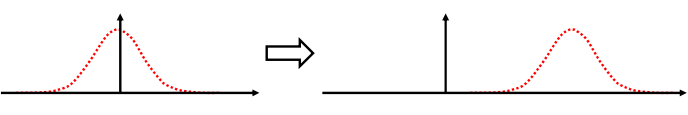

In [ ]:
test_x = mnist_test.data
bn = torch.nn.BatchNorm1d(784)
print(test_x.view(-1,784)[0,300:400])
print(bn(test_x.view(-1,784).float())[0,300:400])

tensor([254, 106,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  83, 253,
        209,  18,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 233, 255,
         83,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 129, 254, 238,
         44,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0], dtype=torch.uint8)
tensor([ 1.8146e+00,  6.9107e-01, -3.8366e-01, -2.6310e-01, -1.6647e-01,
        -7.9966e-02, -4.5500e-02, -1.9554e-02, -1.0000e-02, -1.8623e-02,
        -4.1498e-02, -7.2266e-02, -1.2325e-01, -2.1227e-01, -3.3132e-01,
        -4.9111e-01, -6.8771e-01, -8.6262e-01, -9.3914e-01, -8.7000e-01,
        -7.5819e-01, -7.2218e-01, -7.3981e-01, -8.0997e-01, -9.1121e-01,
        -1.0003e+00, -2.2154e-01,  1.5314e+00,  1.4

In [ ]:
class Classifier_bn(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim,device, output_dim, lr = 0.001, epochs = 10, activation='sigmoid',dropout=0.0):
        super(Classifier_bn, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.epochs = epochs
        self.total_losses = []
        self.accuracy=[]
        self.lr = lr
        self.device = device
        self.activation = activation
        self.dropout = dropout

        self.fc1 = torch.nn.Linear(self.input_dim, self.hidden_dim[0]).to(self.device)
        self.bn1 = torch.nn.BatchNorm1d(self.hidden_dim[0]).to(self.device)
        self.dropout1 = torch.nn.Dropout(self.dropout)
        self.fc2 = torch.nn.Linear(self.hidden_dim[0], self.hidden_dim[1]).to(self.device)
        self.bn2 = torch.nn.BatchNorm1d(self.hidden_dim[1]).to(self.device)
        self.dropout2 = torch.nn.Dropout(self.dropout)
        self.fc3 = torch.nn.Linear(self.hidden_dim[1], self.hidden_dim[2]).to(self.device)
        self.bn3 = torch.nn.BatchNorm1d(self.hidden_dim[2]).to(self.device)
        self.dropout3 = torch.nn.Dropout(self.dropout)
        self.fc4 = torch.nn.Linear(self.hidden_dim[2], self.output_dim).to(self.device)
        self.dropout4 = torch.nn.Dropout(self.dropout)
        
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        torch.nn.init.xavier_uniform_(self.fc3.weight)
        torch.nn.init.xavier_uniform_(self.fc4.weight)
        
    def forward(self, x):
        if self.activation == 'relu':
            #BatchNorm1d(Layer)
            
        else:

            

        return pred

    def fit(self, data):
        criterion = torch.nn.CrossEntropyLoss().to(self.device)
        optimizer = torch.optim.SGD(self.parameters(), lr = self.lr)
        for _ in range(self.epochs):
            total_loss=0
            total_accuracy=0
            for x, y in tqdm(data):
                x = x.view(-1,784).to(self.device)
                y = y.to(self.device)
                
                optimizer.zero_grad()

                pred = self.forward(x)

                loss = criterion(pred, y)
                loss.backward()
                optimizer.step()
                correct_pred = torch.argmax(pred,1) == y
                accuracy = correct_pred.float().mean()
                total_accuracy+=accuracy.item()
                total_loss+=loss.item()

            print('Epoch {} Loss: '.format(_+1),total_loss/len(data))
            self.total_losses.append(total_loss/len(data))
            self.accuracy.append(total_accuracy/len(data))

    def evaluation(self, x, y):
        with torch.no_grad():
            self.eval()
            criterion = torch.nn.CrossEntropyLoss().to(self.device)
            pred = self.forward(x)
            loss = criterion(pred, y)
            correct_pred = torch.argmax(pred,1) == y
            accuracy = correct_pred.float().mean()
            print('Accuracy', accuracy.item())
        
        return accuracy.item()

    def get_weights(self):
        return [self.fc1.weight, self.fc2.weight,self.fc3.weight, self.fc4.weight]


In [ ]:
model_bn = Classifier_bn(input_dim = 784, hidden_dim=(256,128,64), output_dim=10,device=device, activation='relu')

model_bn.fit(train_loader)

100%|██████████| 468/468 [00:05<00:00, 81.53it/s]


Epoch 1 Loss:  1.7997193015538728


100%|██████████| 468/468 [00:05<00:00, 83.47it/s]


Epoch 2 Loss:  1.1245550967943974


100%|██████████| 468/468 [00:05<00:00, 83.43it/s]


Epoch 3 Loss:  0.865203076066115


100%|██████████| 468/468 [00:05<00:00, 83.09it/s]


Epoch 4 Loss:  0.717189999217661


100%|██████████| 468/468 [00:05<00:00, 83.05it/s]


Epoch 5 Loss:  0.6212207795972498


100%|██████████| 468/468 [00:05<00:00, 83.53it/s]


Epoch 6 Loss:  0.5545561816702541


100%|██████████| 468/468 [00:05<00:00, 83.64it/s]


Epoch 7 Loss:  0.5039581515722804


100%|██████████| 468/468 [00:05<00:00, 83.79it/s]


Epoch 8 Loss:  0.46424469326296425


100%|██████████| 468/468 [00:05<00:00, 83.77it/s]


Epoch 9 Loss:  0.4325200269619624


100%|██████████| 468/468 [00:05<00:00, 83.20it/s]

Epoch 10 Loss:  0.40654369609223473


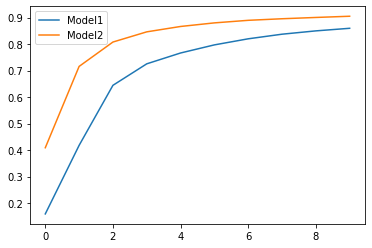

In [ ]:
plt.plot(model_relu_mini.accuracy, label='Model1')
plt.plot(model_bn.accuracy, label='Model2')
plt.legend()

### Better Gradient Descent Methods
*   Other Optimizer

##### Other Optimizer

*   SGD with Momentum
*   Adagrad
*   RMSProp
*   Adam (RMSProp + Momentum)

In [ ]:
class Classifier_opt(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim,device, output_dim, lr = 0.001, epochs = 10, activation='sigmoid',dropout=0.0, opt='sgd', momentum=0.9):
        super(Classifier_opt, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.epochs = epochs
        self.total_losses = []
        self.accuracy=[]
        self.lr = lr
        self.device = device
        self.activation = activation
        self.dropout = dropout
        self.opt=opt
        self.momentum=momentum

        self.fc1 = torch.nn.Linear(self.input_dim, self.hidden_dim[0]).to(self.device)
        self.bn1 = torch.nn.BatchNorm1d(self.hidden_dim[0]).to(self.device)
        self.dropout1 = torch.nn.Dropout(self.dropout)
        self.fc2 = torch.nn.Linear(self.hidden_dim[0], self.hidden_dim[1]).to(self.device)
        self.bn2 = torch.nn.BatchNorm1d(self.hidden_dim[1]).to(self.device)
        self.dropout2 = torch.nn.Dropout(self.dropout)
        self.fc3 = torch.nn.Linear(self.hidden_dim[1], self.hidden_dim[2]).to(self.device)
        self.bn3 = torch.nn.BatchNorm1d(self.hidden_dim[2]).to(self.device)
        self.dropout3 = torch.nn.Dropout(self.dropout)
        self.fc4 = torch.nn.Linear(self.hidden_dim[2], self.output_dim).to(self.device)
        self.dropout4 = torch.nn.Dropout(self.dropout)
        
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        torch.nn.init.xavier_uniform_(self.fc3.weight)
        torch.nn.init.xavier_uniform_(self.fc4.weight)
        
    def forward(self, x):
        if self.activation == 'relu':
            pred = self.dropout1(F.relu(self.bn1(self.fc1(x))))
            pred = self.dropout2(F.relu(self.bn2(self.fc2(pred))))
            pred = self.dropout3(F.relu(self.bn3(self.fc3(pred))))
            pred = self.dropout4(self.fc4(pred))
        else:
            pred = self.dropout1(torch.sigmoid(self.bn1(self.fc1(x))))
            pred = self.dropout2(torch.sigmoid(self.bn2(self.fc2(pred))))
            pred = self.dropout3(torch.sigmoid(self.bn3(self.fc3(pred))))
            pred = self.dropout4(self.fc4(pred))
        
        return pred

    def fit(self, data):
        criterion = torch.nn.CrossEntropyLoss().to(self.device)
        if self.opt =='sgd':
          optimizer = torch.optim.SGD(self.parameters(), lr = self.lr, momentum=self.momentum)
        elif self.opt =='adagrad':
          optimizer = torch.optim.Adagrad(self.parameters(), lr = self.lr)
        elif self.opt =='rmsprop':
          optimizer = torch.optim.RMSprop(self.parameters(), lr = self.lr)
        elif self.opt =='adam':
          optimizer = torch.optim.Adam(self.parameters(), lr = self.lr)
        
        for _ in range(self.epochs):
            total_loss=0
            total_accuracy=0
            for x, y in tqdm(data):
                x = x.view(-1,784).to(self.device)
                y = y.to(self.device)
                optimizer.zero_grad()

                pred = self.forward(x)

                loss = criterion(pred, y)
                loss.backward()
                optimizer.step()
                
                correct_pred = torch.argmax(pred,1) == y
                accuracy = correct_pred.float().mean()
                total_accuracy+=accuracy.item()
                total_loss+=loss.item()

            print('Epoch {} Loss: '.format(_+1),total_loss/len(data))
            self.total_losses.append(total_loss/len(data))
            self.accuracy.append(total_accuracy/len(data))

    def evaluation(self, x, y):
        with torch.no_grad():
            self.eval()
            criterion = torch.nn.CrossEntropyLoss().to(self.device)
            pred = self.forward(x)
            loss = criterion(pred, y)
            correct_pred = torch.argmax(pred,1) == y
            accuracy = correct_pred.float().mean()
            print('Accuracy', accuracy.item())
        
        return accuracy.item()

    def get_weights(self):
        return [self.fc1.weight, self.fc2.weight,self.fc3.weight, self.fc4.weight]


In [ ]:
model_rmsprop = Classifier_opt(input_dim = 784, hidden_dim=(256,128,64), output_dim=10,device=device, activation='relu',opt='rmsprop')
model_adagrad = Classifier_opt(input_dim = 784, hidden_dim=(256,128,64), output_dim=10,device=device, activation='relu',opt='adagrad')
model_adam = Classifier_opt(input_dim = 784, hidden_dim=(256,128,64), output_dim=10,device=device, activation='relu',opt='adam')
model_momentum = Classifier_opt(input_dim = 784, hidden_dim=(256,128,64), output_dim=10,device=device, activation='relu')

In [ ]:
model_rmsprop.fit(train_loader)

100%|██████████| 468/468 [00:05<00:00, 79.38it/s]


Epoch 1 Loss:  0.17685424578654715


100%|██████████| 468/468 [00:05<00:00, 78.14it/s]


Epoch 2 Loss:  0.0727069991099465


100%|██████████| 468/468 [00:05<00:00, 79.39it/s]


Epoch 3 Loss:  0.05113135958806826


100%|██████████| 468/468 [00:05<00:00, 79.71it/s]


Epoch 4 Loss:  0.036013817905177735


100%|██████████| 468/468 [00:05<00:00, 80.31it/s]


Epoch 5 Loss:  0.028647174780121725


100%|██████████| 468/468 [00:05<00:00, 79.87it/s]


Epoch 6 Loss:  0.024111878025369383


100%|██████████| 468/468 [00:05<00:00, 78.89it/s]


Epoch 7 Loss:  0.020162915794525105


100%|██████████| 468/468 [00:05<00:00, 79.95it/s]


Epoch 8 Loss:  0.0180861763516839


100%|██████████| 468/468 [00:05<00:00, 78.80it/s]


Epoch 9 Loss:  0.014581423057800429


100%|██████████| 468/468 [00:05<00:00, 79.76it/s]

Epoch 10 Loss:  0.0134016612233904


In [ ]:
model_adagrad.fit(train_loader)

100%|██████████| 468/468 [00:05<00:00, 80.29it/s]


Epoch 1 Loss:  0.5980231240391731


100%|██████████| 468/468 [00:05<00:00, 80.54it/s]


Epoch 2 Loss:  0.32611310440633035


100%|██████████| 468/468 [00:05<00:00, 80.66it/s]


Epoch 3 Loss:  0.26445125263088787


100%|██████████| 468/468 [00:05<00:00, 81.22it/s]


Epoch 4 Loss:  0.22884496156540182


100%|██████████| 468/468 [00:05<00:00, 80.92it/s]


Epoch 5 Loss:  0.20523719027893156


100%|██████████| 468/468 [00:05<00:00, 80.92it/s]


Epoch 6 Loss:  0.18797045527424058


100%|██████████| 468/468 [00:05<00:00, 80.32it/s]


Epoch 7 Loss:  0.17498558686457127


100%|██████████| 468/468 [00:05<00:00, 79.95it/s]


Epoch 8 Loss:  0.16419820078354105


100%|██████████| 468/468 [00:05<00:00, 80.44it/s]


Epoch 9 Loss:  0.15371483693329188


100%|██████████| 468/468 [00:05<00:00, 80.56it/s]

Epoch 10 Loss:  0.14564847827562663


In [ ]:
model_adam.fit(train_loader)

100%|██████████| 468/468 [00:06<00:00, 76.71it/s]


Epoch 1 Loss:  0.23729713232471392


100%|██████████| 468/468 [00:06<00:00, 76.66it/s]


Epoch 2 Loss:  0.0817362158638863


100%|██████████| 468/468 [00:06<00:00, 75.98it/s]


Epoch 3 Loss:  0.05238481804342447


100%|██████████| 468/468 [00:06<00:00, 77.73it/s]


Epoch 4 Loss:  0.03660747292899312


100%|██████████| 468/468 [00:06<00:00, 77.91it/s]


Epoch 5 Loss:  0.030314601282191135


100%|██████████| 468/468 [00:06<00:00, 77.83it/s]


Epoch 6 Loss:  0.022183777800757185


100%|██████████| 468/468 [00:06<00:00, 77.08it/s]


Epoch 7 Loss:  0.021552957104231454


100%|██████████| 468/468 [00:06<00:00, 76.86it/s]


Epoch 8 Loss:  0.01781354304134416


100%|██████████| 468/468 [00:06<00:00, 77.31it/s]


Epoch 9 Loss:  0.014997243443424376


100%|██████████| 468/468 [00:06<00:00, 76.68it/s]

Epoch 10 Loss:  0.01654571067090604


In [ ]:
model_momentum.fit(train_loader)

100%|██████████| 468/468 [00:05<00:00, 81.68it/s]


Epoch 1 Loss:  0.7829459541373782


100%|██████████| 468/468 [00:05<00:00, 81.79it/s]


Epoch 2 Loss:  0.3294532344891475


100%|██████████| 468/468 [00:05<00:00, 81.71it/s]


Epoch 3 Loss:  0.24066398789485297


100%|██████████| 468/468 [00:05<00:00, 81.04it/s]


Epoch 4 Loss:  0.19579339266205445


100%|██████████| 468/468 [00:05<00:00, 81.56it/s]


Epoch 5 Loss:  0.16553242514944738


100%|██████████| 468/468 [00:05<00:00, 80.71it/s]


Epoch 6 Loss:  0.14390510247431249


100%|██████████| 468/468 [00:05<00:00, 81.64it/s]


Epoch 7 Loss:  0.128001664343298


100%|██████████| 468/468 [00:05<00:00, 81.37it/s]


Epoch 8 Loss:  0.11429463195590636


100%|██████████| 468/468 [00:05<00:00, 81.05it/s]


Epoch 9 Loss:  0.10300944526640014


100%|██████████| 468/468 [00:05<00:00, 81.43it/s]

Epoch 10 Loss:  0.09493635283607958


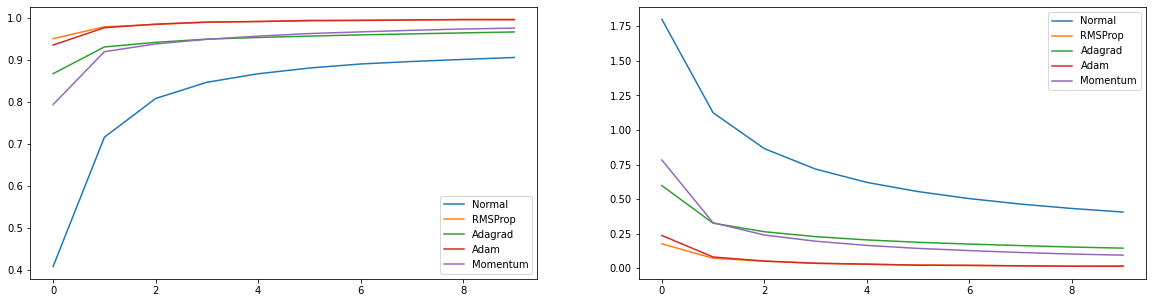

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,2,1)
ax.plot(model_bn.accuracy, label='Normal')
ax.plot(model_rmsprop.accuracy, label='RMSProp')
ax.plot(model_adagrad.accuracy, label='Adagrad')
ax.plot(model_adam.accuracy, label='Adam')
ax.plot(model_momentum.accuracy, label='Momentum')
ax.legend()
ax = fig.add_subplot(1,2,2)
ax.plot(model_bn.total_losses, label='Normal')
ax.plot(model_rmsprop.total_losses, label='RMSProp')
ax.plot(model_adagrad.total_losses, label='Adagrad')
ax.plot(model_adam.total_losses, label='Adam')
ax.plot(model_momentum.total_losses, label='Momentum')
ax.legend()

### Regularization
*   Early Stopping
*   Max norm constraints
*   Weight Decay

##### Early Stopping
*    Validation Set

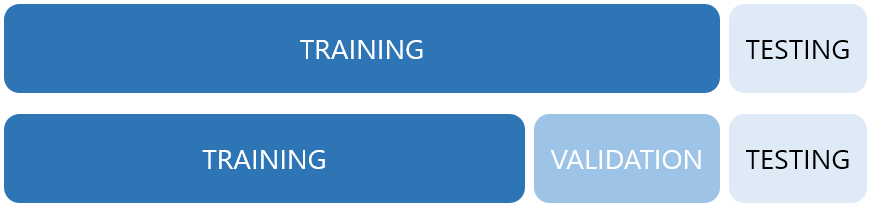

In [ ]:
#from pytorchtools import EarlyStopping
#EarlyStopping(monitor=None, min_delta=0.0,patience = 3, verbose = False, mode = min, strict = True, check_finite = True, stopping_threshold = None, divergence_threshold = None, check_on_train_epoch_end = None)

In [ ]:
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='./Checkpoint.pt'):
        self.patience = patience              # validation set의 Loss가 개선된 뒤 기다리는 epoch의 수
        self.verbose = verbose
        self.counter = 0
        self.best_ = None
        self.early_stop = False
        self.valid_loss_min = np.Inf
        self.delta = delta                    # 개선되었다고 판단되는 Quantity
        self.path = path

    def __call__(self, valid_loss, model):
        score = -valid_loss

        if self.best_ is None:
            self.best_ = score
            self.save_checkpoint(valid_loss, model)
        elif score < self.best_ + self.delta:
            self.counter += 1
            print(f"Early Stopping Counter : {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_ = score
            self.save_checkpoint(valid_loss, model)
            self.counter = 0
    
    def save_checkpoint(self, valid_loss, model):
        if self.verbose:
            print(f"Validation Loss Decreased {self.valid_loss_min:.6f} > {valid_loss:.6f}. Save model ...")
        torch.save(model.state_dict(), self.path)
        self.valid_loss_min = valid_loss

In [ ]:
class Classifier_ES(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim,device, output_dim, lr = 0.001, epochs = 10, activation='sigmoid',dropout=0.0, opt='sgd', momentum=0.9):
        super(Classifier_ES, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.epochs = epochs
        self.train_losses=[]
        self.valid_losses=[]
        self.train_accuracy=[]
        self.valid_accuracy=[]
        self.lr = lr
        self.device = device
        self.activation = activation
        self.dropout = dropout
        self.opt=opt
        self.momentum=momentum

        self.fc1 = torch.nn.Linear(self.input_dim, self.hidden_dim[0]).to(self.device)
        self.bn1 = torch.nn.BatchNorm1d(self.hidden_dim[0]).to(self.device)
        self.dropout1 = torch.nn.Dropout(self.dropout)
        self.fc2 = torch.nn.Linear(self.hidden_dim[0], self.hidden_dim[1]).to(self.device)
        self.bn2 = torch.nn.BatchNorm1d(self.hidden_dim[1]).to(self.device)
        self.dropout2 = torch.nn.Dropout(self.dropout)
        self.fc3 = torch.nn.Linear(self.hidden_dim[1], self.hidden_dim[2]).to(self.device)
        self.bn3 = torch.nn.BatchNorm1d(self.hidden_dim[2]).to(self.device)
        self.dropout3 = torch.nn.Dropout(self.dropout)
        self.fc4 = torch.nn.Linear(self.hidden_dim[2], self.output_dim).to(self.device)
        self.dropout4 = torch.nn.Dropout(self.dropout)
        
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        torch.nn.init.xavier_uniform_(self.fc3.weight)
        torch.nn.init.xavier_uniform_(self.fc4.weight)

        
        
    def forward(self, x):
        if self.activation == 'relu':
            pred = self.dropout1(F.relu(self.bn1(self.fc1(x))))
            pred = self.dropout2(F.relu(self.bn2(self.fc2(pred))))
            pred = self.dropout3(F.relu(self.bn3(self.fc3(pred))))
            pred = self.dropout4(self.fc4(pred))
        else:
            pred = self.dropout1(torch.sigmoid(self.bn1(self.fc1(x))))
            pred = self.dropout2(torch.sigmoid(self.bn2(self.fc2(pred))))
            pred = self.dropout3(torch.sigmoid(self.bn3(self.fc3(pred))))
            pred = self.dropout4(self.fc4(pred))
        
        return pred

    def fit(self, train_data, valid_data,early_stop=False, verbose=True, patience=7):
        if early_stop:
            early_stopping = EarlyStopping(patience = patience, verbose=True)

        criterion = torch.nn.CrossEntropyLoss().to(self.device)
        if self.opt =='sgd':
          optimizer = torch.optim.SGD(self.parameters(), lr = self.lr, momentum=self.momentum)
        elif self.opt =='adagrad':
          optimizer = torch.optim.Adagrad(self.parameters(), lr = self.lr)
        elif self.opt =='rmsprop':
          optimizer = torch.optim.RMSprop(self.parameters(), lr = self.lr)
        elif self.opt =='adam':
          optimizer = torch.optim.Adam(self.parameters(), lr = self.lr)
          
        
        for _ in range(self.epochs):
            total_train_loss=0
            total_valid_loss=0
            total_train_accuracy=0
            total_valid_accuracy=0
            self.train()
            for x, y in tqdm(train_data):
                x = x.view(-1,784).to(self.device)
                y = y.to(self.device)
                optimizer.zero_grad()

                pred = self.forward(x)

                loss = criterion(pred, y)
                loss.backward()
                optimizer.step()
                
                correct_pred = torch.argmax(pred,1) == y
                accuracy = correct_pred.float().mean()
                total_train_accuracy+=accuracy.item()
                total_train_loss+=loss.item()

            self.eval()
            for x, y in valid_data:
                x = x.view(-1,784).to(self.device)
                y = y.to(self.device)
                valid_pred = self.forward(x)
                valid_loss = criterion(valid_pred, y)
                
                vaild_correct_pred = torch.argmax(valid_pred,1) == y
                valid_accuracy = vaild_correct_pred.float().mean()
                total_valid_accuracy += valid_accuracy.item()
                total_valid_loss+=valid_loss.item()


            print('Epoch {} Train Loss: '.format(_+1),total_train_loss/len(train_data),"Valid Loss: ",total_valid_loss/len(valid_data))
            
            self.train_losses.append(total_train_loss/len(train_data))
            self.valid_losses.append(total_valid_loss/len(valid_data))
            self.train_accuracy.append(total_train_accuracy/len(train_data))
            self.valid_accuracy.append(total_valid_accuracy/len(valid_data))

            if early_stop:
                early_stopping(total_valid_loss/len(valid_data), self)

            if early_stop:
                if early_stopping.early_stop:
                    print("Early Stopping...")
                    break
        if early_stop:
            self.load_state_dict(torch.load('Checkpoint.pt'))

    def evaluation(self, x, y):
        with torch.no_grad():
            self.eval()
            criterion = torch.nn.CrossEntropyLoss().to(self.device)
            pred = self.forward(x)
            loss = criterion(pred, y)
            correct_pred = torch.argmax(pred,1) == y
            accuracy = correct_pred.float().mean()
            print('Accuracy', accuracy.item())
        
        return accuracy.item()

    def get_weights(self):
        return [self.fc1.weight, self.fc2.weight,self.fc3.weight, self.fc4.weight]


In [ ]:
from torch.utils.data.dataset import random_split

mnist_train = torchvision.datasets.MNIST(root='MNIST_data/', train=True, transform=torchvision.transforms.ToTensor(), download=True)
mnist_test = torchvision.datasets.MNIST(root='MNIST_data/', train=False,transform=torchvision.transforms.ToTensor(),download=True)

train_set, valid_set = random_split(mnist_train,[50000,10000])

batch_size = 128

train_loader = torch.utils.data.DataLoader(dataset=train_set,batch_size=batch_size, shuffle=True, drop_last=True)
valid_loader = torch.utils.data.DataLoader(dataset=valid_set,batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = torch.utils.data.DataLoader(dataset=mnist_test,batch_size=batch_size, shuffle=True, drop_last=True)

In [ ]:
model_ES = Classifier_ES(input_dim = 784, hidden_dim=(256,128,64), output_dim=10,device=device, activation='relu',opt='adam', epochs=30)

In [ ]:
model_ES.fit(train_data=train_loader, valid_data=valid_loader,early_stop=True, verbose=True, patience=7)

100%|██████████| 390/390 [00:05<00:00, 75.57it/s]


Epoch 1 Train Loss:  0.26749669750913596 Valid Loss:  0.11587144878621285
Validation Loss Decreased inf > 0.115871. Save model ...


100%|██████████| 390/390 [00:05<00:00, 76.41it/s]


Epoch 2 Train Loss:  0.08847614284604788 Valid Loss:  0.09146501066593024
Validation Loss Decreased 0.115871 > 0.091465. Save model ...


100%|██████████| 390/390 [00:05<00:00, 75.78it/s]


Epoch 3 Train Loss:  0.053651565088866614 Valid Loss:  0.09104719645797442
Validation Loss Decreased 0.091465 > 0.091047. Save model ...


100%|██████████| 390/390 [00:05<00:00, 75.16it/s]


Epoch 4 Train Loss:  0.03976104133523618 Valid Loss:  0.07628505614896615
Validation Loss Decreased 0.091047 > 0.076285. Save model ...


100%|██████████| 390/390 [00:05<00:00, 76.67it/s]


Epoch 5 Train Loss:  0.029588360745961276 Valid Loss:  0.07543094199485122
Validation Loss Decreased 0.076285 > 0.075431. Save model ...


100%|██████████| 390/390 [00:05<00:00, 75.70it/s]


Epoch 6 Train Loss:  0.026234501961451502 Valid Loss:  0.07468877490968086
Validation Loss Decreased 0.075431 > 0.074689. Save model ...


100%|██████████| 390/390 [00:05<00:00, 76.71it/s]


Epoch 7 Train Loss:  0.02014709197354909 Valid Loss:  0.08695156687798981
Early Stopping Counter : 1 out of 7


100%|██████████| 390/390 [00:05<00:00, 75.51it/s]


Epoch 8 Train Loss:  0.015688847828931055 Valid Loss:  0.07540501793846488
Early Stopping Counter : 2 out of 7


100%|██████████| 390/390 [00:05<00:00, 75.20it/s]


Epoch 9 Train Loss:  0.012790068916868992 Valid Loss:  0.0840329051328202
Early Stopping Counter : 3 out of 7


100%|██████████| 390/390 [00:05<00:00, 75.74it/s]


Epoch 10 Train Loss:  0.014455390706634484 Valid Loss:  0.08257060175916801
Early Stopping Counter : 4 out of 7


100%|██████████| 390/390 [00:05<00:00, 75.39it/s]


Epoch 11 Train Loss:  0.011804245963979226 Valid Loss:  0.07723283428006256
Early Stopping Counter : 5 out of 7


100%|██████████| 390/390 [00:05<00:00, 76.38it/s]


Epoch 12 Train Loss:  0.01617753130864376 Valid Loss:  0.08180288275560507
Early Stopping Counter : 6 out of 7


100%|██████████| 390/390 [00:05<00:00, 75.61it/s]


Epoch 13 Train Loss:  0.01063931091578128 Valid Loss:  0.0719969763707083
Validation Loss Decreased 0.074689 > 0.071997. Save model ...


100%|██████████| 390/390 [00:05<00:00, 74.77it/s]


Epoch 14 Train Loss:  0.01118574467933892 Valid Loss:  0.08873732451898739
Early Stopping Counter : 1 out of 7


100%|██████████| 390/390 [00:05<00:00, 75.31it/s]


Epoch 15 Train Loss:  0.00946701126343284 Valid Loss:  0.08505018049468979
Early Stopping Counter : 2 out of 7


100%|██████████| 390/390 [00:05<00:00, 74.98it/s]


Epoch 16 Train Loss:  0.01059070440585343 Valid Loss:  0.09070350254963462
Early Stopping Counter : 3 out of 7


100%|██████████| 390/390 [00:05<00:00, 75.89it/s]


Epoch 17 Train Loss:  0.009494191634159786 Valid Loss:  0.07578982003421213
Early Stopping Counter : 4 out of 7


100%|██████████| 390/390 [00:05<00:00, 75.68it/s]


Epoch 18 Train Loss:  0.0055966592479634505 Valid Loss:  0.09666290486422487
Early Stopping Counter : 5 out of 7


100%|██████████| 390/390 [00:05<00:00, 75.64it/s]


Epoch 19 Train Loss:  0.010331479990548896 Valid Loss:  0.09153647578428857
Early Stopping Counter : 6 out of 7


100%|██████████| 390/390 [00:05<00:00, 75.66it/s]


Epoch 20 Train Loss:  0.010196380422656567 Valid Loss:  0.083388860493776
Early Stopping Counter : 7 out of 7
Early Stopping...


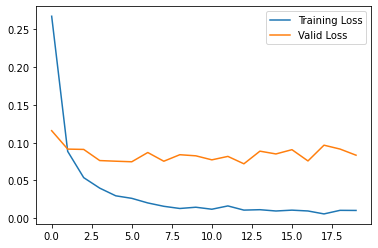

In [ ]:
plt.plot(model_ES.train_losses, label='Training Loss')
plt.plot(model_ES.valid_losses, label='Valid Loss')
plt.legend()

In [ ]:
test_x = mnist_test.data.view(-1,784).float().to(device)
test_y = mnist_test.targets.to(device)
print(model_ES.train_accuracy[-1])
print(model_ES.valid_accuracy[-1])
acc = model_ES.evaluation(test_x,test_y)

0.9965745192307692
0.9800681089743589
Accuracy 0.7128999829292297


##### Max norm constraints

In [ ]:
class Classifier_MNC(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim,device, output_dim, lr = 0.001, epochs = 10, activation='sigmoid',dropout=0.0, opt='sgd', momentum=0.9, max_norm = 0.5):
        super(Classifier_MNC, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.epochs = epochs
        self.train_losses=[]
        self.valid_losses=[]
        self.train_accuracy=[]
        self.valid_accuracy=[]
        self.lr = lr
        self.device = device
        self.activation = activation
        self.dropout = dropout
        self.opt=opt
        self.momentum=momentum
        self.max_norm=max_norm

        self.fc1 = torch.nn.Linear(self.input_dim, self.hidden_dim[0]).to(self.device)
        self.bn1 = torch.nn.BatchNorm1d(self.hidden_dim[0]).to(self.device)
        self.dropout1 = torch.nn.Dropout(self.dropout)
        self.fc2 = torch.nn.Linear(self.hidden_dim[0], self.hidden_dim[1]).to(self.device)
        self.bn2 = torch.nn.BatchNorm1d(self.hidden_dim[1]).to(self.device)
        self.dropout2 = torch.nn.Dropout(self.dropout)
        self.fc3 = torch.nn.Linear(self.hidden_dim[1], self.hidden_dim[2]).to(self.device)
        self.bn3 = torch.nn.BatchNorm1d(self.hidden_dim[2]).to(self.device)
        self.dropout3 = torch.nn.Dropout(self.dropout)
        self.fc4 = torch.nn.Linear(self.hidden_dim[2], self.output_dim).to(self.device)
        self.dropout4 = torch.nn.Dropout(self.dropout)
        
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        torch.nn.init.xavier_uniform_(self.fc3.weight)
        torch.nn.init.xavier_uniform_(self.fc4.weight)

        
    def forward(self, x):
        if self.activation == 'relu':
            pred = self.dropout1(F.relu(self.bn1(self.fc1(x))))
            pred = self.dropout2(F.relu(self.bn2(self.fc2(pred))))
            pred = self.dropout3(F.relu(self.bn3(self.fc3(pred))))
            pred = self.dropout4(self.fc4(pred))
        else:
            pred = self.dropout1(torch.sigmoid(self.bn1(self.fc1(x))))
            pred = self.dropout2(torch.sigmoid(self.bn2(self.fc2(pred))))
            pred = self.dropout3(torch.sigmoid(self.bn3(self.fc3(pred))))
            pred = self.dropout4(self.fc4(pred))
        
        return pred

    def fit(self, train_data, valid_data, early_stop=False, verbose=True, patience=7):
        if early_stop:
            early_stopping = EarlyStopping(patience = patience, verbose=True)

        criterion = torch.nn.CrossEntropyLoss().to(self.device)
        if self.opt =='sgd':
          optimizer = torch.optim.SGD(self.parameters(), lr = self.lr, momentum=self.momentum)
        elif self.opt =='adagrad':
          optimizer = torch.optim.Adagrad(self.parameters(), lr = self.lr)
        elif self.opt =='rmsprop':
          optimizer = torch.optim.RMSprop(self.parameters(), lr = self.lr)
        elif self.opt =='adam':
          optimizer = torch.optim.Adam(self.parameters(), lr = self.lr)
          
        
        for _ in range(self.epochs):
            total_train_loss=0
            total_valid_loss=0
            total_train_accuracy=0
            total_valid_accuracy=0
            self.train()
            for x, y in tqdm(train_data):
                x = x.view(-1,784).to(self.device)
                y = y.to(self.device)
                optimizer.zero_grad()

                pred = self.forward(x)

                loss = criterion(pred, y)
                loss.backward()
                torch.nn.utils.clip_grad_norm_(self.parameters(),self.max_norm)
                optimizer.step()
                
                correct_pred = torch.argmax(pred,1) == y
                accuracy = correct_pred.float().mean()
                total_train_accuracy+=accuracy.item()
                total_train_loss+=loss.item()

            self.eval()
            for x, y in valid_data:
                x = x.view(-1,784).to(self.device)
                y = y.to(self.device)
                valid_pred = self.forward(x)
                valid_loss = criterion(valid_pred, y)
                
                vaild_correct_pred = torch.argmax(valid_pred,1) == y
                valid_accuracy = vaild_correct_pred.float().mean()
                total_valid_accuracy += valid_accuracy.item()
                total_valid_loss+=valid_loss.item()


            print('Epoch {} Train Loss: '.format(_+1),total_train_loss/len(train_data),"Valid Loss: ",total_valid_loss/len(valid_data))
            
            self.train_losses.append(total_train_loss/len(train_data))
            self.valid_losses.append(total_valid_loss/len(valid_data))
            self.train_accuracy.append(total_train_accuracy/len(train_data))
            self.valid_accuracy.append(total_valid_accuracy/len(valid_data))
            
            if early_stop:
                early_stopping(total_valid_loss/len(valid_data), self)

            if early_stop:
                if early_stopping.early_stop:
                    print("Early Stopping...")
                    break

        if early_stop:
            self.load_state_dict(torch.load('Checkpoint.pt'))

    def evaluation(self, x, y):
        with torch.no_grad():
            self.eval()
            criterion = torch.nn.CrossEntropyLoss().to(self.device)
            pred = self.forward(x)
            loss = criterion(pred, y)
            correct_pred = torch.argmax(pred,1) == y
            accuracy = correct_pred.float().mean()
            print('Accuracy', accuracy.item())
        
        return accuracy.item()

    def get_weights(self):
        return [self.fc1.weight, self.fc2.weight,self.fc3.weight, self.fc4.weight]

In [ ]:
model_MNC = Classifier_MNC(input_dim = 784, hidden_dim=(256,128,64), output_dim=10,device=device, activation='relu',opt='adam', epochs=10)
model_MNC.fit(train_data=train_loader, valid_data=valid_loader)

100%|██████████| 390/390 [00:05<00:00, 72.72it/s]


Epoch 1 Train Loss:  0.24351485358216823 Valid Loss:  0.11344113310751243


100%|██████████| 390/390 [00:05<00:00, 73.28it/s]


Epoch 2 Train Loss:  0.08075199528382375 Valid Loss:  0.08939890854824813


100%|██████████| 390/390 [00:05<00:00, 72.52it/s]


Epoch 3 Train Loss:  0.051029600588700326 Valid Loss:  0.07555894665897657


100%|██████████| 390/390 [00:05<00:00, 72.59it/s]


Epoch 4 Train Loss:  0.03614897073115198 Valid Loss:  0.07922760910617235


100%|██████████| 390/390 [00:05<00:00, 73.19it/s]


Epoch 5 Train Loss:  0.02702359900218793 Valid Loss:  0.07957293386929311


100%|██████████| 390/390 [00:05<00:00, 72.88it/s]


Epoch 6 Train Loss:  0.02124519773060456 Valid Loss:  0.07741581104122676


100%|██████████| 390/390 [00:05<00:00, 72.77it/s]


Epoch 7 Train Loss:  0.01871635018167301 Valid Loss:  0.07203603681558982


100%|██████████| 390/390 [00:05<00:00, 73.10it/s]


Epoch 8 Train Loss:  0.01532908112813647 Valid Loss:  0.09330898103638528


100%|██████████| 390/390 [00:05<00:00, 73.16it/s]


Epoch 9 Train Loss:  0.012937789499007452 Valid Loss:  0.08996253297067223


100%|██████████| 390/390 [00:05<00:00, 72.60it/s]


Epoch 10 Train Loss:  0.012045795758977199 Valid Loss:  0.09387809619641839


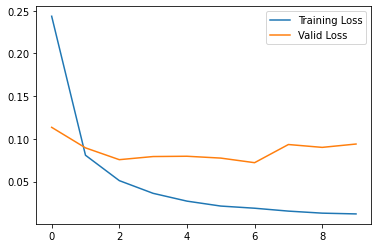

In [ ]:
plt.plot(model_MNC.train_losses, label='Training Loss')
plt.plot(model_MNC.valid_losses, label='Valid Loss')
plt.legend()

##### Weight Decay

In [ ]:
class Classifier_WD(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim,device, output_dim, lr = 0.001, epochs = 10, activation='sigmoid',dropout=0.0, opt='sgd', momentum=0.9, max_norm = 0.5, weight_decay = 0):
        super(Classifier_WD, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.epochs = epochs
        self.train_losses=[]
        self.valid_losses=[]
        self.train_accuracy=[]
        self.valid_accuracy=[]
        self.lr = lr
        self.device = device
        self.activation = activation
        self.dropout = dropout
        self.opt=opt
        self.momentum=momentum
        self.max_norm=max_norm
        self.weight_decay = weight_decay

        self.fc1 = torch.nn.Linear(self.input_dim, self.hidden_dim[0]).to(self.device)
        self.bn1 = torch.nn.BatchNorm1d(self.hidden_dim[0]).to(self.device)
        self.dropout1 = torch.nn.Dropout(self.dropout)
        self.fc2 = torch.nn.Linear(self.hidden_dim[0], self.hidden_dim[1]).to(self.device)
        self.bn2 = torch.nn.BatchNorm1d(self.hidden_dim[1]).to(self.device)
        self.dropout2 = torch.nn.Dropout(self.dropout)
        self.fc3 = torch.nn.Linear(self.hidden_dim[1], self.hidden_dim[2]).to(self.device)
        self.bn3 = torch.nn.BatchNorm1d(self.hidden_dim[2]).to(self.device)
        self.dropout3 = torch.nn.Dropout(self.dropout)
        self.fc4 = torch.nn.Linear(self.hidden_dim[2], self.output_dim).to(self.device)
        self.dropout4 = torch.nn.Dropout(self.dropout)
        
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        torch.nn.init.xavier_uniform_(self.fc3.weight)
        torch.nn.init.xavier_uniform_(self.fc4.weight)

        
    def forward(self, x):
        if self.activation == 'relu':
            pred = self.dropout1(F.relu(self.bn1(self.fc1(x))))
            pred = self.dropout2(F.relu(self.bn2(self.fc2(pred))))
            pred = self.dropout3(F.relu(self.bn3(self.fc3(pred))))
            pred = self.dropout4(self.fc4(pred))
        else:
            pred = self.dropout1(torch.sigmoid(self.bn1(self.fc1(x))))
            pred = self.dropout2(torch.sigmoid(self.bn2(self.fc2(pred))))
            pred = self.dropout3(torch.sigmoid(self.bn3(self.fc3(pred))))
            pred = self.dropout4(self.fc4(pred))
        
        return pred

    def fit(self, train_data, valid_data, early_stop=False, verbose=True, patience=7):
        if early_stop:
            early_stopping = EarlyStopping(patience = patience, verbose=True)

        criterion = torch.nn.CrossEntropyLoss().to(self.device)
        if self.opt =='sgd':
          optimizer = torch.optim.SGD(self.parameters(), lr = self.lr, momentum=self.momentum, weight_decay=self.weight_decay)
        elif self.opt =='adagrad':
          optimizer = torch.optim.Adagrad(self.parameters(), lr = self.lr, weight_decay=self.weight_decay)
        elif self.opt =='rmsprop':
          optimizer = torch.optim.RMSprop(self.parameters(), lr = self.lr, weight_decay=self.weight_decay)
        elif self.opt =='adam':
          optimizer = torch.optim.Adam(self.parameters(), lr = self.lr, weight_decay=self.weight_decay)
          
        
        for _ in range(self.epochs):
            total_train_loss=0
            total_valid_loss=0
            total_train_accuracy=0
            total_valid_accuracy=0
            self.train()
            for x, y in tqdm(train_data):
                x = x.view(-1,784).to(self.device)
                y = y.to(self.device)
                optimizer.zero_grad()

                pred = self.forward(x)

                loss = criterion(pred, y)
                loss.backward()
                #torch.nn.utils.clip_grad_norm_(self.parameters(),self.max_norm)
                optimizer.step()
                
                correct_pred = torch.argmax(pred,1) == y
                accuracy = correct_pred.float().mean()
                total_train_accuracy+=accuracy.item()
                total_train_loss+=loss.item()

            self.eval()
            for x, y in valid_data:
                x = x.view(-1,784).to(self.device)
                y = y.to(self.device)
                valid_pred = self.forward(x)
                valid_loss = criterion(valid_pred, y)
                
                vaild_correct_pred = torch.argmax(valid_pred,1) == y
                valid_accuracy = vaild_correct_pred.float().mean()
                total_valid_accuracy += valid_accuracy.item()
                total_valid_loss+=valid_loss.item()


            print('Epoch {} Train Loss: '.format(_+1),total_train_loss/len(train_data),"Valid Loss: ",total_valid_loss/len(valid_data))
            
            self.train_losses.append(total_train_loss/len(train_data))
            self.valid_losses.append(total_valid_loss/len(valid_data))
            self.train_accuracy.append(total_train_accuracy/len(train_data))
            self.valid_accuracy.append(total_valid_accuracy/len(valid_data))
            
            if early_stop:
                early_stopping(total_valid_loss/len(valid_data), self)

            if early_stop:
                if early_stopping.early_stop:
                    print("Early Stopping...")
                    break

        if early_stop:
            self.load_state_dict(torch.load('Checkpoint.pt'))

    def evaluation(self, x, y):
        with torch.no_grad():
            self.eval()
            criterion = torch.nn.CrossEntropyLoss().to(self.device)
            pred = self.forward(x)
            loss = criterion(pred, y)
            correct_pred = torch.argmax(pred,1) == y
            accuracy = correct_pred.float().mean()
            print('Accuracy', accuracy.item())
        
        return accuracy.item()

    def get_weights(self):
        return [self.fc1.weight, self.fc2.weight,self.fc3.weight, self.fc4.weight]

In [ ]:
model_WD1 = Classifier_WD(input_dim = 784, hidden_dim=(256,128,64), output_dim=10,device=device, activation='relu',opt='adam', epochs=10,weight_decay=1)
model_WD1.fit(train_data=train_loader, valid_data=valid_loader)

100%|██████████| 390/390 [00:05<00:00, 74.73it/s]


Epoch 1 Train Loss:  1.1282206821135985 Valid Loss:  1.4802893996238708


100%|██████████| 390/390 [00:05<00:00, 75.91it/s]


Epoch 2 Train Loss:  1.6067272421641228 Valid Loss:  1.8963339084233992


100%|██████████| 390/390 [00:05<00:00, 76.24it/s]


Epoch 3 Train Loss:  2.027927273359054 Valid Loss:  2.1804554951496615


100%|██████████| 390/390 [00:05<00:00, 75.83it/s]


Epoch 4 Train Loss:  2.2518817803798576 Valid Loss:  2.2993072118514624


100%|██████████| 390/390 [00:05<00:00, 74.98it/s]


Epoch 5 Train Loss:  2.3020212998756997 Valid Loss:  2.3024610770054355


100%|██████████| 390/390 [00:05<00:00, 75.29it/s]


Epoch 6 Train Loss:  2.3023529676290657 Valid Loss:  2.3025212776966586


100%|██████████| 390/390 [00:05<00:00, 75.06it/s]


Epoch 7 Train Loss:  2.302294482328953 Valid Loss:  2.3024284717364187


100%|██████████| 390/390 [00:05<00:00, 75.41it/s]


Epoch 8 Train Loss:  2.302330959760226 Valid Loss:  2.3024040766251392


100%|██████████| 390/390 [00:05<00:00, 75.79it/s]


Epoch 9 Train Loss:  2.3023455136861557 Valid Loss:  2.302326291035383


100%|██████████| 390/390 [00:05<00:00, 74.58it/s]


Epoch 10 Train Loss:  2.3023170972481752 Valid Loss:  2.3024332431646495


In [ ]:
model_WD2 = Classifier_WD(input_dim = 784, hidden_dim=(256,128,64), output_dim=10,device=device, activation='relu',opt='adam', epochs=10,weight_decay=0.1)
model_WD2.fit(train_data=train_loader, valid_data=valid_loader)

100%|██████████| 390/390 [00:05<00:00, 76.19it/s]


Epoch 1 Train Loss:  0.4804799565902123 Valid Loss:  0.4940857035227311


100%|██████████| 390/390 [00:05<00:00, 75.27it/s]


Epoch 2 Train Loss:  0.49881006685587076 Valid Loss:  0.6391663230382479


100%|██████████| 390/390 [00:05<00:00, 75.59it/s]


Epoch 3 Train Loss:  0.6018111866254073 Valid Loss:  0.6934523995106037


100%|██████████| 390/390 [00:05<00:00, 75.52it/s]


Epoch 4 Train Loss:  0.6429474558585729 Valid Loss:  0.6687106490135193


100%|██████████| 390/390 [00:05<00:00, 75.51it/s]


Epoch 5 Train Loss:  0.6425604899724324 Valid Loss:  0.6978058815002441


100%|██████████| 390/390 [00:05<00:00, 75.33it/s]


Epoch 6 Train Loss:  0.6377679377030103 Valid Loss:  0.5944077403117449


100%|██████████| 390/390 [00:05<00:00, 75.04it/s]


Epoch 7 Train Loss:  0.6246853943054492 Valid Loss:  0.6343993919017987


100%|██████████| 390/390 [00:05<00:00, 75.21it/s]


Epoch 8 Train Loss:  0.6180017368915753 Valid Loss:  0.5980176551219745


100%|██████████| 390/390 [00:05<00:00, 74.92it/s]


Epoch 9 Train Loss:  0.6116034055367494 Valid Loss:  0.5849645263873614


100%|██████████| 390/390 [00:05<00:00, 73.97it/s]


Epoch 10 Train Loss:  0.6115366330513587 Valid Loss:  0.5828544474565066


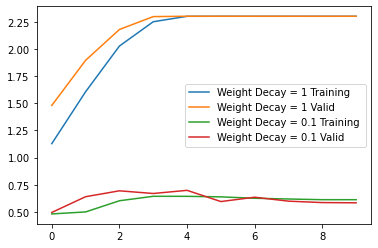

In [ ]:
plt.plot(model_WD1.train_losses, label='Weight Decay = 1 Training ')
plt.plot(model_WD1.valid_losses, label='Weight Decay = 1 Valid')
plt.plot(model_WD2.train_losses, label='Weight Decay = 0.1 Training ')
plt.plot(model_WD2.valid_losses, label='Weight Decay = 0.1 Valid')
plt.legend()

In [ ]:
cifar_train = torchvision.datasets.CIFAR10(root='/', train=True, transform=torchvision.transforms.ToTensor(), download=True)
cifar_test = torchvision.datasets.CIFAR10(root='/', train=False, transform=torchvision.transforms.ToTensor(), download=True)

batch_size = 64

train_loader = torch.utils.data.DataLoader(dataset=cifar_train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = torch.utils.data.DataLoader(dataset=cifar_test, shuffle=True,batch_size=10000 , drop_last=True)

In [ ]:
cifar_label = {0:'airplane', 1:'automobile', 2: 'bird', 3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}
images = cifar_train.data[60:80]
labels = cifar_train.targets[60:80]
print(images.shape)
fig = plt.figure(figsize=(25,5))
for i in range(len(images)):
    ax = fig.add_subplot(2, 20/2, i+1)
    ax.imshow(images[i])
    ax.set_title(cifar_label[labels[i]])
    ax.axis('off')

In [ ]:
#TODO
class 